Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np 
def linan(a11, a12, b1, a21, a22, b2):
  a = np.array([[float(a11), float(a12)], [float(a21), float(a22)]])
  b = np.array([float(b1), float(b2)])
  x = np.linalg.solve(a, b)
  return x[0], x[1]

a11, a12, b1 = input().split()
a21, a22, b2 = input().split()
print(linan(a11, a12, b1, a21, a22, b2))


1 1 2
2 1 1
(-1.0, 3.0)


### Подсказка 1

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np

# вариант 2 - срезы
def decorate_matrix(x):
  a = np.zeros(pow(x, 2)).reshape(x, x)
  a[:, 0] = 1
  a[0] = 1
  a[:, x-1] = 1
  a[x-1] = 1
  return(a)

x = int(input())
print(decorate_matrix(x))

5
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


In [ ]:
import numpy as np

# вариант 1 - np.pad
def decorate_matrix(x):
    a = np.zeros((x - 2, x - 2), int)

    a = np.pad(a, (1, 1), 'constant', constant_values=(1, 1))
    return(a)

x = int(input())
print(decorate_matrix(int(x)))

5
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
  return pow(x + a, 2) - b

def g(x):
  return abs(f(x))

a, b = map(float, input().split())
x = np.linspace(-80,80,1000)
dx = x[1]-x[0]
y = f(x)
y2 = g(x)
dydx = np.gradient(y, dx)
dy2dx = np.gradient(y2, dx)
# plt.plot(x, dydx)
# plt.plot(x, dy2dx)

idx = np.argwhere(np.diff(np.sign(dydx - dy2dx))).flatten()
# print('Минимумы для 1ой функции:', x[idx[0]], x[idx[2]])
# print('Минимум для 2ой функции:', x[idx[1]])
print(x[idx].round(2))
# plt.plot(x[idx], dydx[idx], 'ro')
# plt.plot(x[idx], dy2dx[idx], 'ro')
# plt.show()

3 4
[-5.21 -3.12 -0.88]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

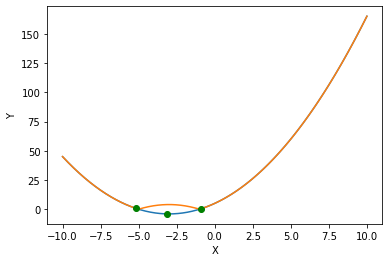

In [ ]:
def plot_function(f, a, b):
    x = np.linspace(-10, 10, 1000)
    y = list(map(f, x))

    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")

plot_function(f, a, b)
plot_function(g, a, b)
plt.plot(x[idx], y[idx], 'go')

plt.show()


# Задание 5

3
1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import numpy as np 
import math as m
# from scipy.stats import binom
# ans1 = 1 - binom.pmf(0, n, p)


n = 1000
# !python --version

def combb(n, k):
  ans = m.factorial(n)/(m.factorial(k)*m.factorial(n-k))
  return ans


def binomial(k, n, p):
  q = 1 - p
  ans = combb(n, k) * p**k * q**(n-k)
  return ans
# 1 
# Используем формулу биномиального распр (P = C(n; k) * p**k * q**(n-k)) где q = 1 - p

p = 2/pow(2, 10) # 2 подходящие комбинации
ans1 = 1 - binomial(0, n, p)
print('Answer 1 =', ans1)

# 2
# PPPPPPPP.OO
# PPPPPPPP.OP
# O.PPPPPPPP.O
# OO.PPPPPPPP
# PO.PPPPPPPP
# OOOOOOOO.PP
# OOOOOOOO.PO
# P.OOOOOOOO.P
# PP.OOOOOOO
# OP.OOOOOOO

p = 10/pow(2, 10) # 10 подходящих комбинаций
ans2 = 1 - binomial(0, 1000, p)
print('Answer 2 =', ans2)

# 3
p = 2/pow(2, 10) # 2 подходящие комбинации
ans3 = binomial(3, 1000, p)
print('Answer 3 =', ans3)

Answer 1 = 0.858440454732242
Answer 2 = 0.9999452986105908
Answer 3 = 0.1762873858121736
